 Análise dos impostos arrecadados por estado. 

 Contém os dados de arrecadação de impostos mensal por Unidade da Federação, contendo receitas administradas e não administradas pela RFB.

Data: 2000-2024

Fonte: Base dos Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [6]:
df = pd.read_csv(r"C:\Users\anabi\OneDrive\Área de Trabalho\Git On33\Projeto\Pesquisa\Projeto\arrecadação.csv")

In [10]:
nulos_colunas = df.isnull().sum()
print(nulos_colunas)

ano                                           0
mes                                           0
sigla_uf                                      0
sigla_uf_nome                                 0
imposto_importacao                            0
imposto_exportacao                            0
ipi_fumo                                      0
ipi_bebidas                                   0
ipi_automoveis                                0
ipi_importacoes                               0
ipi_outros                                    0
irpf                                          0
irpj_demais_empresas                          0
irrf_rendimentos_trabalho                     0
irrf_rendimentos_capital                      0
irrf_remessas_exterior                        0
irrf_outros_rendimentos                       0
iof                                           0
itr                                           0
ipmf                                       7263
cpmf                                    

In [11]:
nulos_linhas = df.isnull().sum(axis=1)
print(nulos_linhas)

0       15
1       15
2       15
3       15
4       15
        ..
7906    13
7907    13
7908    13
7909    13
7910    13
Length: 7911, dtype: int64


In [12]:
df.duplicated().sum()

np.int64(0)

In [23]:

df['total_arrecadacao'] = df[
    ['imposto_importacao', 'imposto_exportacao', 'ipi_fumo', 'ipi_bebidas',
     'ipi_automoveis', 'ipi_importacoes', 'ipi_outros', 'irpf',
     'irpj_demais_empresas', 'irrf_rendimentos_trabalho',
     'irrf_rendimentos_capital', 'irrf_remessas_exterior',
     'irrf_outros_rendimentos', 'iof', 'itr', 'ipmf', 'cpmf', 'cofins',
     'cofins_entidades_financeiras', 'cofins_demais_empresas', 'pis_pasep',
     'pis_pasep_entidades_financeiras', 'pis_pasep_demais_empresas', 'csll',
     'csll_entidades_financeiras', 'csll_demais_empresas',
     'cide_combustiveis_parcela_nao_dedutivel', 'cide_combustiveis', 'cpsss_1',
     'cpsss_2', 'contribuicao_fundaf', 'refis', 'paes', 'retencoes_fonte',
     'pagamento_unificado', 'outras_receitas_rfb', 'demais_receitas',
     'receita_previdenciaria', 'receita_previdenciaria_propria',
     'receita_previdenciaria_demais', 'receitas_outros_orgaos']
].sum(axis=1)

total_arrecadacao_por_estado = df.groupby('sigla_uf')['total_arrecadacao'].sum()


estado_mais_arrecadou = total_arrecadacao_por_estado.idxmax()
valor_mais_arrecadou = total_arrecadacao_por_estado.max()

estado_menos_arrecadou = total_arrecadacao_por_estado.idxmin()
valor_menos_arrecadou = total_arrecadacao_por_estado.min()


print(f"O estado que mais arrecadou de 2000 a 2024 foi {estado_mais_arrecadou} com um total de {valor_mais_arrecadou:.2f} em arrecadação.")
print(f"O estado que menos arrecadou de 2000 a 2024 foi {estado_menos_arrecadou} com um total de {valor_menos_arrecadou:.2f} em arrecadação.")


O estado que mais arrecadou de 2000 a 2024 foi SP com um total de 8884715294282.96 em arrecadação.
O estado que menos arrecadou de 2000 a 2024 foi RR com um total de 17952336549.29 em arrecadação.


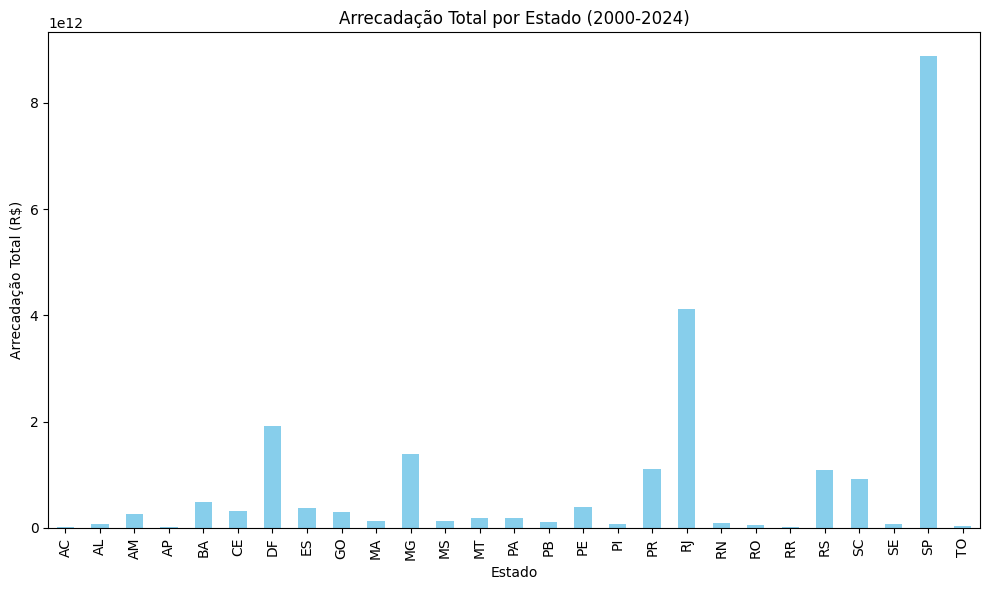

In [32]:
total_arrecadacao_por_estado = df.groupby('sigla_uf')['total_arrecadacao'].sum()

plt.figure(figsize=(10, 6))
total_arrecadacao_por_estado.plot(kind='bar', color='skyblue')
plt.title('Arrecadação Total por Estado (2000-2024)')
plt.xlabel('Estado')
plt.ylabel('Arrecadação Total (R$)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

O ano que teve mais arrecadação foi 2023 com um total de 2234155088969.90 em arrecadação.


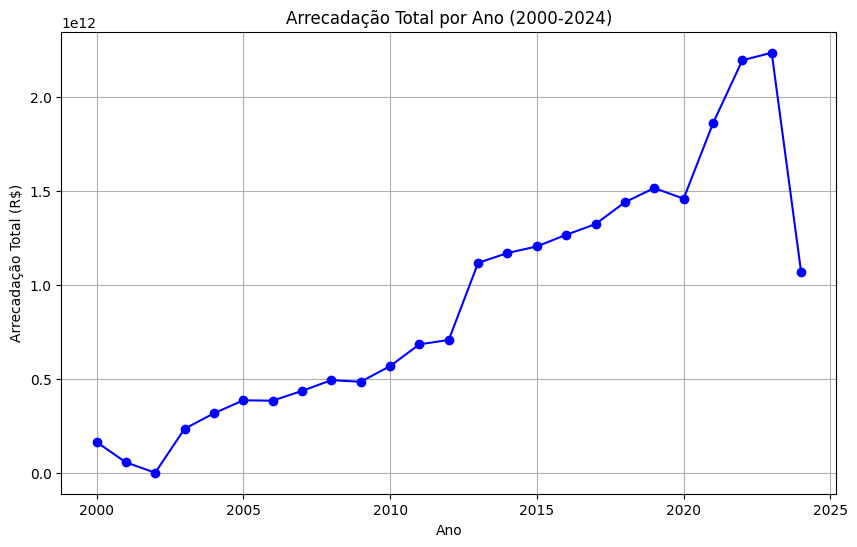

In [16]:


total_arrecadacao_por_ano = df.groupby('ano')['total_arrecadacao'].sum()


ano_mais_arrecadou = total_arrecadacao_por_ano.idxmax()
valor_mais_arrecadou = total_arrecadacao_por_ano.max()


print(f"O ano que teve mais arrecadação foi {ano_mais_arrecadou} com um total de {valor_mais_arrecadou:.2f} em arrecadação.")

plt.figure(figsize=(10, 6))
plt.plot(total_arrecadacao_por_ano.index, total_arrecadacao_por_ano.values, marker='o', linestyle='-', color='blue')
plt.title('Arrecadação Total por Ano (2000-2024)')
plt.xlabel('Ano')
plt.ylabel('Arrecadação Total (R$)')
plt.grid(True)

plt.show()

#CONSULTA SQL

In [11]:

conn = sqlite3.connect('arrecadacao.db')

df.to_sql('impostos', conn, index=False, if_exists='replace')

query_balança_comercial = """
SELECT 
    sigla_uf, 
    ano,
    SUM(imposto_importacao) AS total_importacao,
    SUM(imposto_exportacao) AS total_exportacao,
    SUM(imposto_exportacao) - SUM(imposto_importacao) AS balanca_comercial
FROM 
    impostos
GROUP BY 
    sigla_uf, ano;
"""

df_balança_comercial = pd.read_sql_query(query_balança_comercial, conn)

print(df_balança_comercial)

df_balança_comercial.to_sql('balanca_comercial', conn, if_exists='replace', index=False)

conn.close()


    sigla_uf   ano  total_importacao  total_exportacao  balanca_comercial
0         AC  2000      9.763000e+03             13.00      -9.750000e+03
1         AC  2001      2.112400e+04         914962.00       8.938380e+05
2         AC  2002      2.757137e+03              0.00      -2.757137e+03
3         AC  2003      6.581800e+04             92.00      -6.572600e+04
4         AC  2004      7.064700e+04             10.00      -7.063700e+04
..       ...   ...               ...               ...                ...
670       TO  2020      4.917969e+04           4108.64      -4.507105e+04
671       TO  2021      3.257564e+04           2696.08      -2.987956e+04
672       TO  2022      2.949833e+04           1292.66      -2.820567e+04
673       TO  2023      3.635880e+07           3152.44      -3.635565e+07
674       TO  2024      2.299979e+07           1009.42      -2.299878e+07

[675 rows x 5 columns]


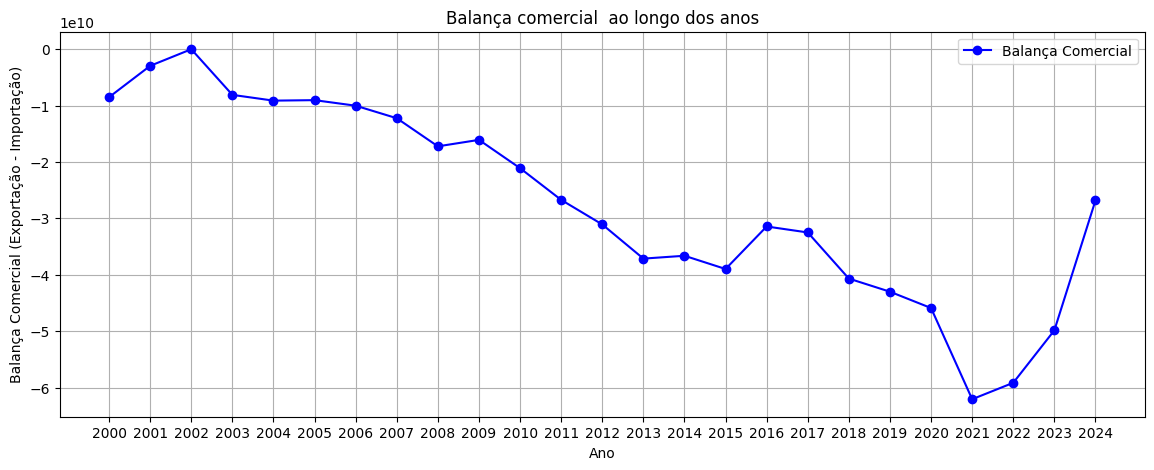

In [19]:
df_brasil = df_balança_comercial.groupby('ano')["balanca_comercial"].sum().reset_index()

plt.figure(figsize=(14, 5))
plt.plot(df_brasil['ano'], df_brasil['balanca_comercial'], marker='o', linestyle='-', color='b', label='Balança Comercial')


plt.title('Balança comercial  ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Balança Comercial (Exportação - Importação)')
plt.xticks(df_brasil['ano']) 
plt.legend()


plt.grid(True)
plt.show()

In [17]:

total_arrecadacao_por_imposto = df[
    ['imposto_importacao', 'imposto_exportacao', 'ipi_fumo', 'ipi_bebidas',
     'ipi_automoveis', 'ipi_importacoes', 'ipi_outros', 'irpf',
     'irpj_demais_empresas', 'irrf_rendimentos_trabalho',
     'irrf_rendimentos_capital', 'irrf_remessas_exterior',
     'irrf_outros_rendimentos', 'iof', 'itr', 'ipmf', 'cpmf', 'cofins',
     'cofins_entidades_financeiras', 'cofins_demais_empresas', 'pis_pasep',
     'pis_pasep_entidades_financeiras', 'pis_pasep_demais_empresas', 'csll',
     'csll_entidades_financeiras', 'csll_demais_empresas',
     'cide_combustiveis_parcela_nao_dedutivel', 'cide_combustiveis', 'cpsss_1',
     'cpsss_2', 'contribuicao_fundaf', 'refis', 'paes', 'retencoes_fonte',
     'pagamento_unificado', 'outras_receitas_rfb', 'demais_receitas',
     'receita_previdenciaria', 'receita_previdenciaria_propria',
     'receita_previdenciaria_demais', 'receitas_outros_orgaos']
].sum()


imposto_mais_arrecadou = total_arrecadacao_por_imposto.idxmax()
valor_mais_arrecadou = total_arrecadacao_por_imposto.max()


print(f"O imposto que mais arrecadou foi {imposto_mais_arrecadou} com um total de {valor_mais_arrecadou:.2f} em arrecadação.")


O imposto que mais arrecadou foi cofins_demais_empresas com um total de 3626105809338.76 em arrecadação.


In [ ]:
#TESTE DE HIPÓTESE
#H0: A pandemia de COVID-19 não teve impacto significativo na arrecadação de impostos entre 2020 e 2021.
#H1: A pandemia de COVID-19 teve um impacto significativo na arrecadação de impostos entre 2020 e 2021.

In [1]:
from scipy.stats import ttest_ind

In [18]:
df['ano'] = pd.to_datetime(df['ano'], format='%Y')




In [29]:
total_arrecadacao= df[
    ['imposto_importacao', 'imposto_exportacao', 'ipi_fumo', 'ipi_bebidas',
     'ipi_automoveis', 'ipi_importacoes', 'ipi_outros', 'irpf',
     'irpj_demais_empresas', 'irrf_rendimentos_trabalho',
     'irrf_rendimentos_capital', 'irrf_remessas_exterior',
     'irrf_outros_rendimentos', 'iof', 'itr', 'ipmf', 'cpmf', 'cofins',
     'cofins_entidades_financeiras', 'cofins_demais_empresas', 'pis_pasep',
     'pis_pasep_entidades_financeiras', 'pis_pasep_demais_empresas', 'csll',
     'csll_entidades_financeiras', 'csll_demais_empresas',
     'cide_combustiveis_parcela_nao_dedutivel', 'cide_combustiveis', 'cpsss_1',
     'cpsss_2', 'contribuicao_fundaf', 'refis', 'paes', 'retencoes_fonte',
     'pagamento_unificado', 'outras_receitas_rfb', 'demais_receitas',
     'receita_previdenciaria', 'receita_previdenciaria_propria',
     'receita_previdenciaria_demais', 'receitas_outros_orgaos']
].sum(axis=1)

arrecadacao_pre_pandemia = total_arrecadacao[total_arrecadacao.index.isin([2018, 2019])].dropna()
arrecadacao_na_pandemia = total_arrecadacao[total_arrecadacao.index.isin([2020, 2021])].dropna()
media_pre_pandemia = arrecadacao_pre_pandemia.mean()
media_na_pandemia = arrecadacao_na_pandemia.mean()

t_stat, p_value = ttest_ind(arrecadacao_pre_pandemia, arrecadacao_na_pandemia)

print(f"Valor t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Média de arrecadação antes da pandemia: {media_pre_pandemia:.2f}")
print(f"Média de arrecadação durante a pandemia: {media_na_pandemia:.2f}")

alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula (H0). A pandemia de COVID-19 teve um impacto significativo na arrecadação de impostos no Brasil.")
else:
    print("Não rejeitamos a hipótese nula (H0). A pandemia de COVID-19 não teve um impacto significativo na arrecadação de impostos no Brasil.")


Valor t: -1.1882
Valor p: 0.3567
Média de arrecadação antes da pandemia: 5199142852.39
Média de arrecadação durante a pandemia: 6082466612.60
Não rejeitamos a hipótese nula (H0). A pandemia de COVID-19 não teve um impacto significativo na arrecadação de impostos no Brasil.


<function matplotlib.pyplot.show(close=None, block=None)>

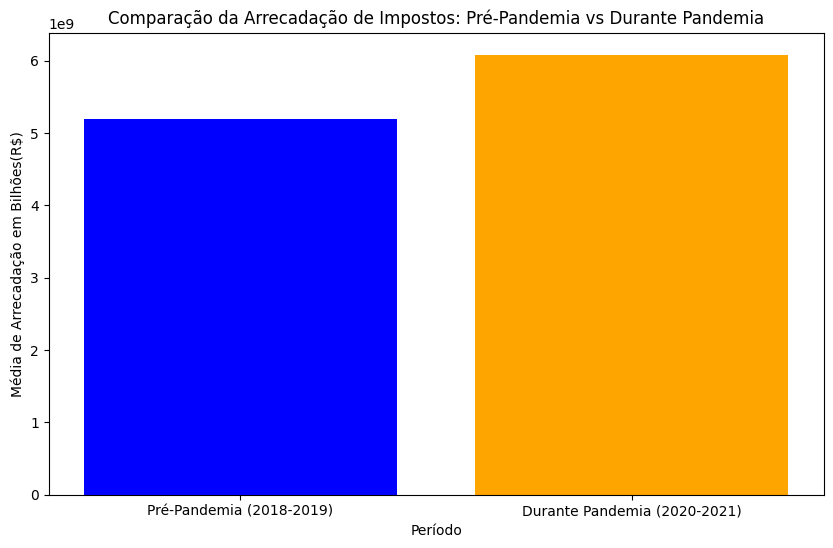

In [31]:
media_pre_pandemia = arrecadacao_pre_pandemia.mean()
media_na_pandemia = arrecadacao_na_pandemia.mean()


periodos = ['Pré-Pandemia (2018-2019)', 'Durante Pandemia (2020-2021)']
medias = [media_pre_pandemia, media_na_pandemia]


plt.figure(figsize=(10, 6))
plt.bar(periodos, medias, color=['blue', 'orange'])


plt.title('Comparação da Arrecadação de Impostos: Pré-Pandemia vs Durante Pandemia')
plt.ylabel('Média de Arrecadação em Bilhões(R$)')
plt.xlabel('Período')
plt.show
